In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
bank_df = pd.read_csv("/content/drive/MyDrive/Concept and technologies of AI/week2/Copy of bank.csv")

In [64]:
# 2. Check info of the DataFrame and identify columns
print("--- 2. DataFrame Info ---")
bank_df.info()


--- 2. DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [63]:
# (a) columns with dtypes=object
object_cols = bank_df.select_dtypes(include=['object']).columns
print(f"Columns with dtype 'object': {list(object_cols)}")
print("-" * 30)

Columns with dtype 'object': ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
------------------------------


In [20]:
# (b) unique values of those columns.
print("Unique values for 'object' columns:")
for col in object_cols:
    print(f"'{col}': {bank_df[col].unique()}")
print("-" * 30)

Unique values for 'object' columns:
'job': ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
'marital': ['married' 'single' 'divorced']
'education': ['tertiary' 'secondary' 'unknown' 'primary']
'default': ['no' 'yes']
'housing': ['yes' 'no']
'loan': ['no' 'yes']
'contact': ['unknown' 'cellular' 'telephone']
'month': ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
'poutcome': ['unknown' 'failure' 'other' 'success']
'y': ['no' 'yes']
------------------------------


In [21]:
# (c) check for the total number of null values in each column.
null_counts = bank_df.isnull().sum()
print("Null values per column:")
print(null_counts[null_counts > 0])
if (null_counts == 0).all():
    print("No null values found in any column.")
print("-" * 30)

Null values per column:
Series([], dtype: int64)
No null values found in any column.
------------------------------


In [22]:
# 3. Drop all the columns with dtypes object and store in new DataFrame,
#    also write the DataFrame in ”.csv” with name ”banknumericdata.csv”
bank_numeric_df = bank_df.select_dtypes(exclude=['object'])
bank_numeric_df.to_csv("banknumericdata.csv", index=False)
print("Numeric DataFrame created and saved as 'banknumericdata.csv'.")
print("-" * 30)

Numeric DataFrame created and saved as 'banknumericdata.csv'.
------------------------------


In [23]:
# 4. Read ”banknumericdata.csv” and Find the summary statistics.
bank_numeric_read = pd.read_csv("banknumericdata.csv")
print("--- 4. Summary Statistics for 'banknumericdata.csv' ---")
print(bank_numeric_read.describe())
print("-" * 30)

--- 4. Summary Statistics for 'banknumericdata.csv' ---
                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%    

In [24]:
medical_df = pd.read_csv("/content/drive/MyDrive/Concept and technologies of AI/week2/Copy of medical_students_dataset.csv")

In [25]:
# 2. Check info of the DataFrame and identify column with missing (null) values.
print("--- 2. DataFrame Info and Missing Values ---")
medical_df.info()
print("-" * 30)

--- 2. DataFrame Info and Missing Values ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB
------------------------------


In [26]:
# Identify columns with missing values
missing_values = medical_df.isnull().sum()
missing_cols = missing_values[missing_values > 0]
print("Columns with missing values:")
print(missing_cols)
print("-" * 30)

Columns with missing values:
Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            20000
Blood Type        20000
BMI               20000
Temperature       20000
Heart Rate        20000
Blood Pressure    20000
Cholesterol       20000
Diabetes          20000
Smoking           20000
dtype: int64
------------------------------


In [27]:
# 3. For the column with missing values fill the values using various techniques.
#    Explain why you selected the particular methods.

print("--- 3. Data Imputation ---")
# 'Age' and 'Height' are continuous numerical data.
# 'BMI', 'Temperature', 'Cholesterol' are also continuous numerical data.
# The **Median** is generally preferred over the mean for imputation of numerical columns
# as it is less sensitive to **outliers**.

# Impute numerical columns with the Median
impute_median_cols = ['Age', 'Height', 'BMI', 'Temperature', 'Cholesterol']
for col in impute_median_cols:
    median_val = medical_df[col].median()
    medical_df[col].fillna(median_val, inplace=True)
    print(f"Filled missing values in '{col}' with the **Median** ({median_val}).")

# 'Gender' and 'Blood Type' are categorical data.
# Missing values in categorical columns are best filled with the **Mode** (most frequent value)
# or a separate category like 'Unknown'. Using the mode assumes the missing values are
# most likely to belong to the majority class.

# Impute categorical columns with the Mode
impute_mode_cols = ['Gender', 'Blood Type']
for col in impute_mode_cols:
    mode_val = medical_df[col].mode()[0]
    medical_df[col].fillna(mode_val, inplace=True)
    print(f"Filled missing values in '{col}' with the **Mode** ({mode_val}).")

# Verification of imputation
print("-" * 30)
print("Verification after imputation:")
print(medical_df.isnull().sum())
print("-" * 30)

--- 3. Data Imputation ---
Filled missing values in 'Age' with the **Median** (26.0).
Filled missing values in 'Height' with the **Median** (174.8999141442403).
Filled missing values in 'BMI' with the **Median** (22.671401449817218).
Filled missing values in 'Temperature' with the **Median** (98.5996537029178).
Filled missing values in 'Cholesterol' with the **Median** (184.0).
Filled missing values in 'Gender' with the **Mode** (Male).
Filled missing values in 'Blood Type' with the **Mode** (B).
------------------------------
Verification after imputation:
Student ID        20000
Age                   0
Gender                0
Height                0
Weight            20000
Blood Type            0
BMI                   0
Temperature           0
Heart Rate        20000
Blood Pressure    20000
Cholesterol           0
Diabetes          20000
Smoking           20000
dtype: int64
------------------------------


/tmp/ipython-input-3464927705.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  medical_df[col].fillna(median_val, inplace=True)
/tmp/ipython-input-3464927705.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [28]:
# 4. Check for any duplicate values present in Dataset and do necessary to manage the duplicate items.
#    {Hint: dataset.duplicated.sum()}

print("--- 4. Checking and Managing Duplicates ---")
duplicate_count = medical_df.duplicated().sum()
print(f"Total number of duplicate rows found: {duplicate_count}")

if duplicate_count > 0:
    # Action: Drop duplicates. Keeping the first occurrence is standard practice.
    medical_df.drop_duplicates(inplace=True)
    print("Duplicate rows have been dropped from the DataFrame.")
    print(f"New row count: {len(medical_df)}")
else:
    print("No duplicate rows to manage.")
print("-" * 30)

--- 4. Checking and Managing Duplicates ---
Total number of duplicate rows found: 9109
Duplicate rows have been dropped from the DataFrame.
New row count: 190891
------------------------------


In [29]:
titanic_df = pd.read_csv("/content/drive/MyDrive/Concept and technologies of AI/week2/Copy of Titanic-Dataset.csv")

In [30]:
# Create the subsetted DataFrame
subset_cols = ['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']
subset_df = titanic_df[subset_cols]

In [31]:
# Filter for Pclass = 1 (First-class passengers)
first_class_df = subset_df[subset_df['Pclass'] == 1]

In [32]:
# Calculate statistics for 'Fare'
fare_mean = first_class_df['Fare'].mean()
fare_median = first_class_df['Fare'].median()
fare_max = first_class_df['Fare'].max()
fare_min = first_class_df['Fare'].min()

In [33]:
print("--- Problem 1 Results: First-Class Passenger Fare Statistics ---")
print(f"Number of First-Class Passengers: {len(first_class_df)}")
print(f"Mean Fare: ${fare_mean:.2f}")
print(f"Median Fare: ${fare_median:.2f}")
print(f"Maximum Fare: ${fare_max:.2f}")
print(f"Minimum Fare: ${fare_min:.2f}")

--- Problem 1 Results: First-Class Passenger Fare Statistics ---
Number of First-Class Passengers: 216
Mean Fare: $84.15
Median Fare: $60.29
Maximum Fare: $512.33
Minimum Fare: $0.00


In [34]:
# Check null values in 'Age'
age_null_count = titanic_df['Age'].isnull().sum()
print("--- Problem 2 Results: Nulls in 'Age' ---")
print(f"Null values in the 'Age' column: {age_null_count}")

--- Problem 2 Results: Nulls in 'Age' ---
Null values in the 'Age' column: 177


In [35]:
# Drop rows where 'Age' is null
titanic_df.dropna(subset=['Age'], inplace=True)

In [36]:
# Verification
age_null_count_after = titanic_df['Age'].isnull().sum()
print(f"Null values in 'Age' after dropping: {age_null_count_after}")
print(f"New total number of rows: {len(titanic_df)}")

Null values in 'Age' after dropping: 0
New total number of rows: 714


In [37]:
# 1. Use one-hot encoding to convert the 'Embarked' column into separate binary columns
# We use get_dummies from pandas. Note: The 'Embarked' column also has 2 null values
# in the original dataset, which get_dummies treats as a separate category if not dropped.
# Let's drop those two nulls first to ensure we only encode C, Q, S.
titanic_df.dropna(subset=['Embarked'], inplace=True)

embarked_dummies = pd.get_dummies(titanic_df['Embarked'], prefix='Embarked')

In [38]:
# 2. Add these new columns to the original DataFrame.
titanic_df = pd.concat([titanic_df, embarked_dummies], axis=1)

In [39]:
# 3. Drop the original 'Embarked' column.
titanic_df.drop('Embarked', axis=1, inplace=True)

In [40]:
# 4. Print the first few rows of the modified DataFrame to verify the changes.
print("--- Problem 3 Results: One-Hot Encoding 'Embarked' ---")
print("First few rows of the modified DataFrame:")
print(titanic_df[['Pclass', 'Sex', 'Age', 'Embarked_C', 'Embarked_Q', 'Embarked_S']].head())

--- Problem 3 Results: One-Hot Encoding 'Embarked' ---
First few rows of the modified DataFrame:
   Pclass     Sex   Age  Embarked_C  Embarked_Q  Embarked_S
0       3    male  22.0       False       False        True
1       1  female  38.0        True       False       False
2       3  female  26.0       False       False        True
3       1  female  35.0       False       False        True
4       3    male  35.0       False       False        True


In [41]:
import seaborn as sns

In [42]:
# Calculate mean survival rate by 'Sex'
survival_by_sex = titanic_df.groupby('Sex')['Survived'].mean().reset_index()

In [43]:
print("--- Problem 4 Results: Mean Survival Rate by Sex ---")
print(survival_by_sex)
print("-" * 30)

--- Problem 4 Results: Mean Survival Rate by Sex ---
      Sex  Survived
0  female  0.752896
1    male  0.205298
------------------------------


/tmp/ipython-input-3544937710.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=survival_by_sex, palette='viridis')
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128674 (\N{SHIP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


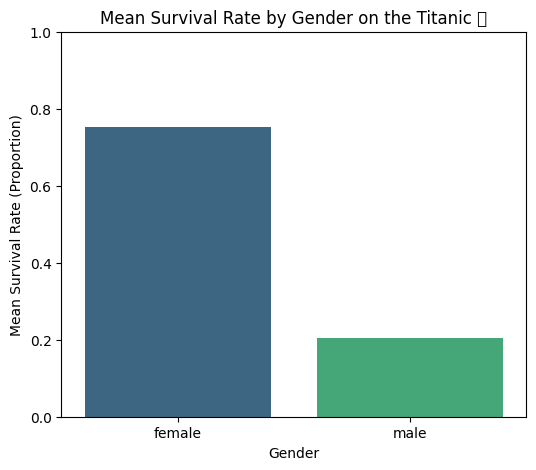

**Conclusion:** Females had a significantly **higher** survival rate (0.75) than males (0.21).


In [44]:
# Draw a visualization
plt.figure(figsize=(6, 5))
sns.barplot(x='Sex', y='Survived', data=survival_by_sex, palette='viridis')
plt.title('Mean Survival Rate by Gender on the Titanic 🚢')
plt.ylabel('Mean Survival Rate (Proportion)')
plt.xlabel('Gender')
plt.ylim(0, 1)
plt.show()


print(f"**Conclusion:** Females had a significantly **higher** survival rate ({survival_by_sex[survival_by_sex['Sex'] == 'female']['Survived'].iloc[0]:.2f}) than males ({survival_by_sex[survival_by_sex['Sex'] == 'male']['Survived'].iloc[0]:.2f}).")

In [50]:
temp_titanic_df = pd.read_csv("/content/drive/MyDrive/Concept and technologies of AI/week2/Copy of Titanic-Dataset.csv").dropna(subset=['Age', 'Embarked'])

print("--- Problem 5 Results: Survival Distribution by Gender and Embarkation Port ---")

--- Problem 5 Results: Survival Distribution by Gender and Embarkation Port ---


<Figure size 1000x600 with 0 Axes>

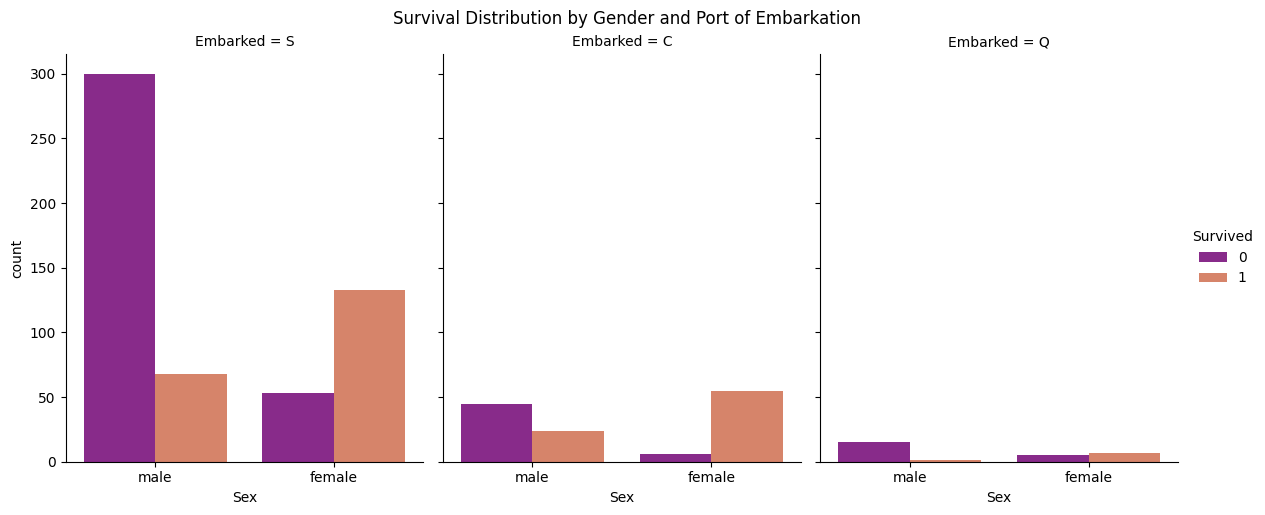


**Observation:**
* **Southampton (S)** had the most passengers and the lowest overall survival proportion for males.
* **Cherbourg (C)** shows a relatively higher survival proportion for both genders, particularly among females, compared to the other ports.
* **Queenstown (Q)** had the fewest passengers.


In [53]:
plt.figure(figsize=(10, 6))
# Using a 'Survived' count plot, broken down by 'Sex' and 'Embarked'
sns.catplot(x='Sex', hue='Survived', col='Embarked', data=temp_titanic_df,
              kind='count', palette='plasma', saturation=0.7, height=5, aspect=0.8)
plt.suptitle('Survival Distribution by Gender and Port of Embarkation', y=1.02)
plt.show()

print("\n**Observation:**")
print("* **Southampton (S)** had the most passengers and the lowest overall survival proportion for males.")
print("* **Cherbourg (C)** shows a relatively higher survival proportion for both genders, particularly among females, compared to the other ports.")
print("* **Queenstown (Q)** had the fewest passengers.")

In [54]:
# Create the 'Age_Group' column based on 5 quantiles
# Note: We continue with the 'titanic_df' which has nulls in 'Age' and 'Embarked' already dropped.
titanic_df['Age_Group'] = pd.qcut(titanic_df['Age'], q=5, labels=False, duplicates='drop')

In [55]:
# Calculate the mean survival rate ('Survived') for each combination of 'Pclass' and 'Age_Group'
survival_by_group = titanic_df.groupby(['Pclass', 'Age_Group'])['Survived'].mean().reset_index()

In [56]:
survival_pivot = survival_by_group.pivot(index='Age_Group', columns='Pclass', values='Survived')

In [57]:
print("--- Problem 6 Results: Mean Survival Rate by Age Group and Pclass ---")
print("Mean Survival Rate (Age Group vs Pclass):")
print(survival_pivot)
print("-" * 30)

--- Problem 6 Results: Mean Survival Rate by Age Group and Pclass ---
Mean Survival Rate (Age Group vs Pclass):
Pclass            1         2         3
Age_Group                              
0          0.809524  0.742857  0.333333
1          0.761905  0.400000  0.197674
2          0.666667  0.416667  0.283582
3          0.772727  0.461538  0.166667
4          0.500000  0.363636  0.088235
------------------------------


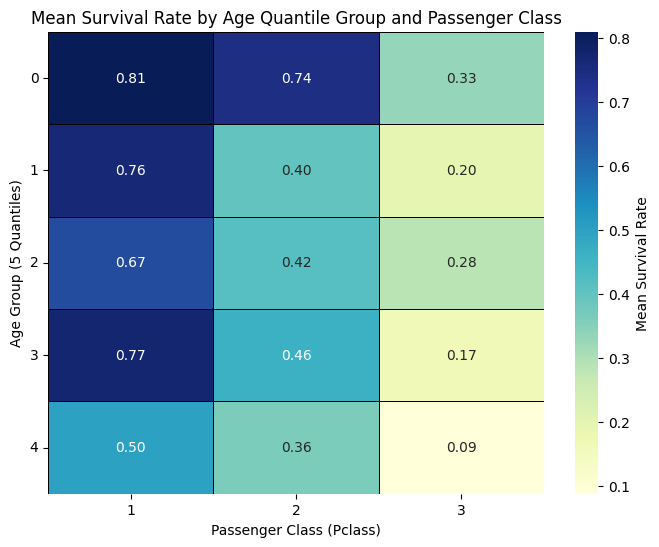


**Observation:**
* Survival rate is generally highest in **Pclass 1** across all age groups.
* The **youngest age group (0)** often has one of the highest survival rates, especially in Pclass 1 and P2, regardless of the overall class survival.
* Survival rate is consistently **lowest in Pclass 3**.


In [58]:
# Draw a visualization (Heatmap is suitable for two categorical/binned variables)
plt.figure(figsize=(8, 6))
sns.heatmap(survival_pivot, annot=True, fmt=".2f", cmap="YlGnBu",
            linewidths=.5, linecolor='black',
            cbar_kws={'label': 'Mean Survival Rate'})

# Customizing labels for clarity
plt.title('Mean Survival Rate by Age Quantile Group and Passenger Class')
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Age Group (5 Quantiles)')
plt.yticks(rotation=0)
plt.show()


print("\n**Observation:**")
print("* Survival rate is generally highest in **Pclass 1** across all age groups.")
print("* The **youngest age group (0)** often has one of the highest survival rates, especially in Pclass 1 and P2, regardless of the overall class survival.")
print("* Survival rate is consistently **lowest in Pclass 3**.")